## Import Libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Import data

In [4]:
path_commercial_activity = 'data/commercial_activity_df.csv'
path_products = 'data/products_df.csv'
path_sociodemographic = 'data/sociodemographic_df.csv'

products_df = pd.read_csv(path_products, index_col=0)
commercial_df = pd.read_csv(path_commercial_activity, index_col=0)
socio_df = pd.read_csv(path_sociodemographic, index_col=0)

In [5]:
socio_df.isnull().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1512103
dtype: int64

In [6]:
print(products_df.shape)
print(commercial_df.shape)
print(socio_df.shape)

(5962924, 17)
(5962924, 6)
(5962924, 8)


## Univariate Analysis


### Products 

In [7]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 818.9+ MB


In [130]:
commercial_df.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64

In [9]:
## Dtypes
# First of all let's fix the types for those features that don't have nulls

for col in products_df.columns[2:]:
    if col == 'payroll' or col == 'pension_plan':
        continue
    else:
        products_df[col] = products_df[col].astype('uint8')

In [10]:
# sanity check
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  uint8  
 3   loans               uint8  
 4   mortgage            uint8  
 5   funds               uint8  
 6   securities          uint8  
 7   long_term_deposit   uint8  
 8   em_account_pp       uint8  
 9   credit_card         uint8  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     uint8  
 13  emc_account         uint8  
 14  debit_card          uint8  
 15  em_account_p        uint8  
 16  em_acount           uint8  
dtypes: float64(2), int64(1), object(1), uint8(13)
memory usage: 301.4+ MB


In [11]:
## duplicates

products_df[products_df.duplicated()].shape

(0, 17)

In [12]:
# no duplicates

In [13]:
## Null values

# we only have 61 values for two features, let's have a closer look

pd.set_option('display.max_rows', None)
display(products_df[pd.isna(products_df['payroll'])])
pd.set_option('display.max_rows', 20)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
20792,1023793,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
46071,1097831,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
51949,1132935,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
56489,1118340,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
176458,1266281,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
182861,1255266,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
207733,1376688,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
209123,1374202,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
212733,1365111,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
214600,1363870,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0


In [14]:
# all 61 nans are in the same rows, so there are only 61 rows in total with missing values

# Two strategies to follow:
#   1. Keep them with value "unknown". They become categorical features.
#   2. Drop them. They only represent a 0.001% of total rows. 
# 
# Need to assess the tradeof between possible noise / added complexity of keeping them vs the potential loss of valuable information if dropped.
# Later on when I plot everything and have a better understanding of the information I have at hand I will decide whether I drop them or not.
# Right now I am more inclined to drop them 61 records. Will also need to check the history of those clients.

Text(0.5, 0.98, 'Distribution of product features')

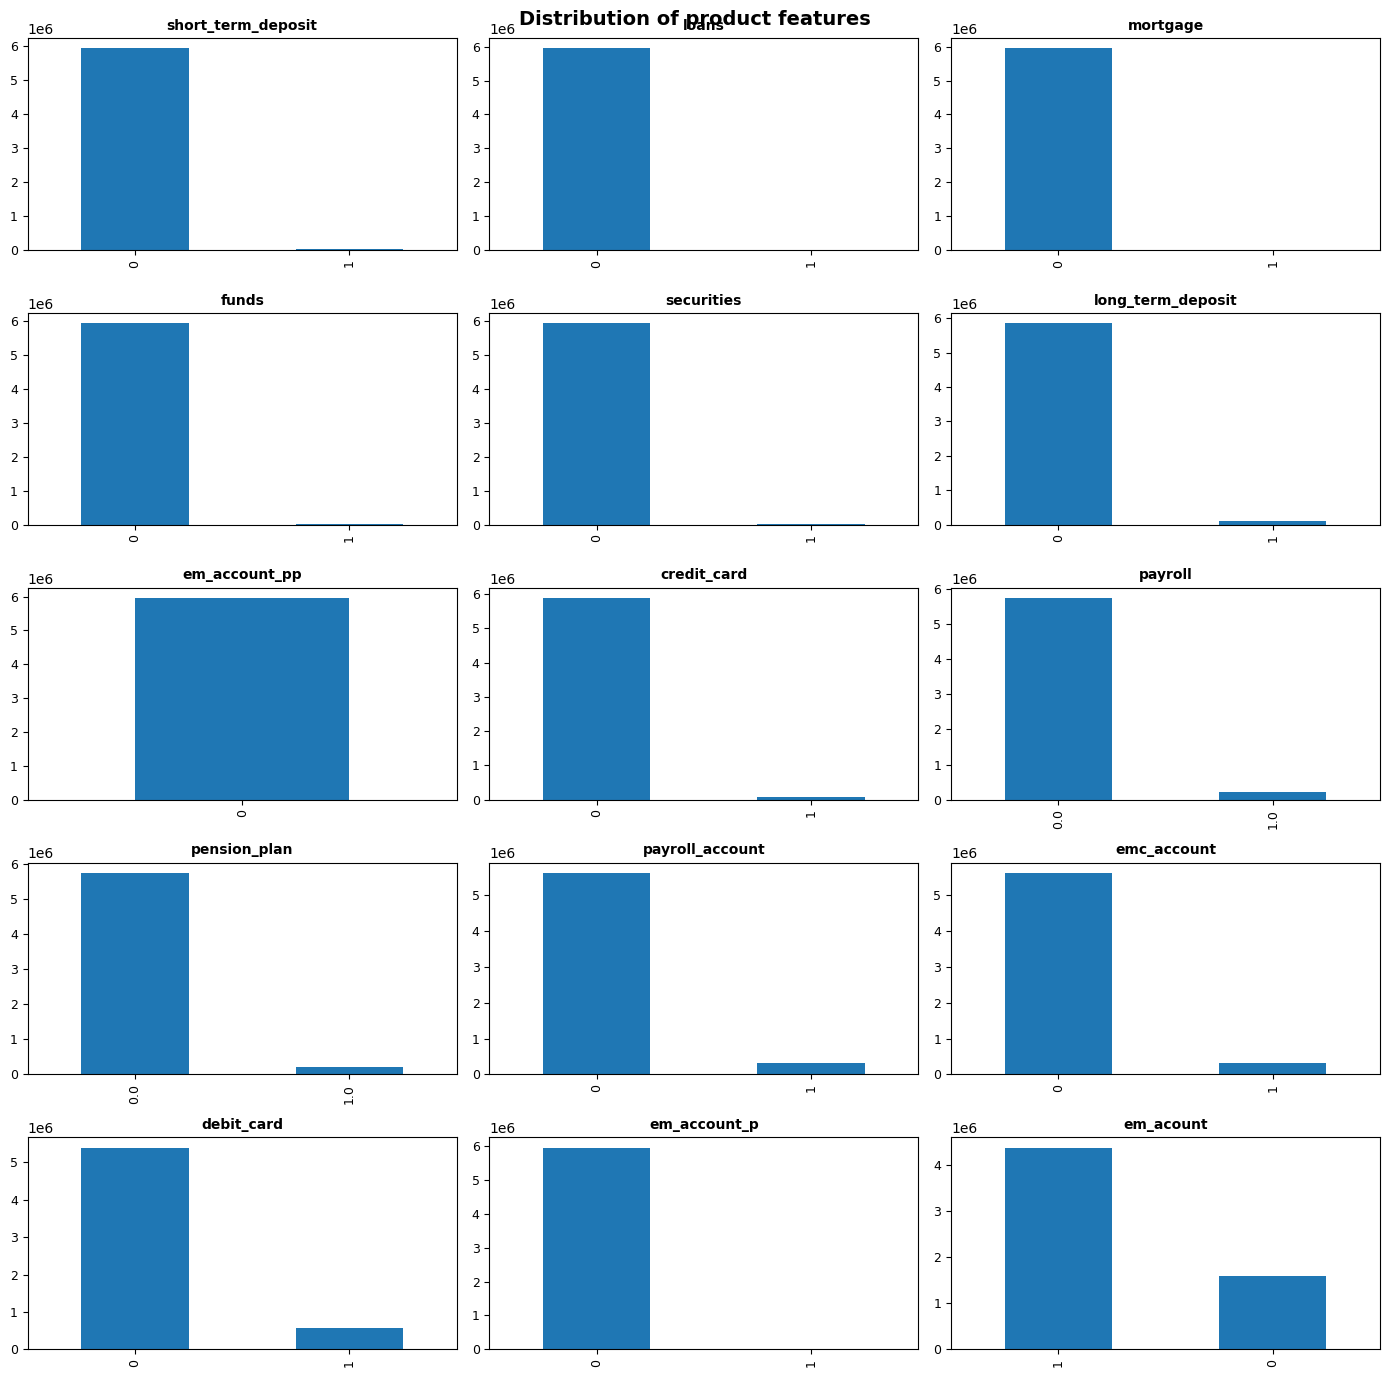

In [15]:
## Plot 

# All of them are boolean variables so I will plot them in one go
bool_feat = [col for col in products_df.columns if (products_df[col].dtype != 'O') & (col != 'pk_cid')]

# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(bool_feat):
    barplot = products_df[col].value_counts().plot.bar(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")

# text for each column
# investigate how to do
# for rect, y_pct_ in zip(barplot, y_pct):
#     y_pct_ = round(y_pct_*100, 2)
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height}:{y_pct_}%", ha = 'center', va = "bottom", rotation = 60)

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Distribution of product features', fontsize = 14, fontweight = 'bold')

In [16]:
# variance for most features is very low.
# - em_account_pp: we have no customers for this one. Will not be useful for the modelling but yes to say to the board that something needs to be done.
# - even though the variance is low we might recognize patterns in the ones we have that will help us understand which type of client is purchasing which product
# Also, since there are monthly partitions for each client, i think it will be more useful to check the evolution of the products on a monthly basis and so on

Text(0.5, 0.98, 'Monthly evolution of product features')

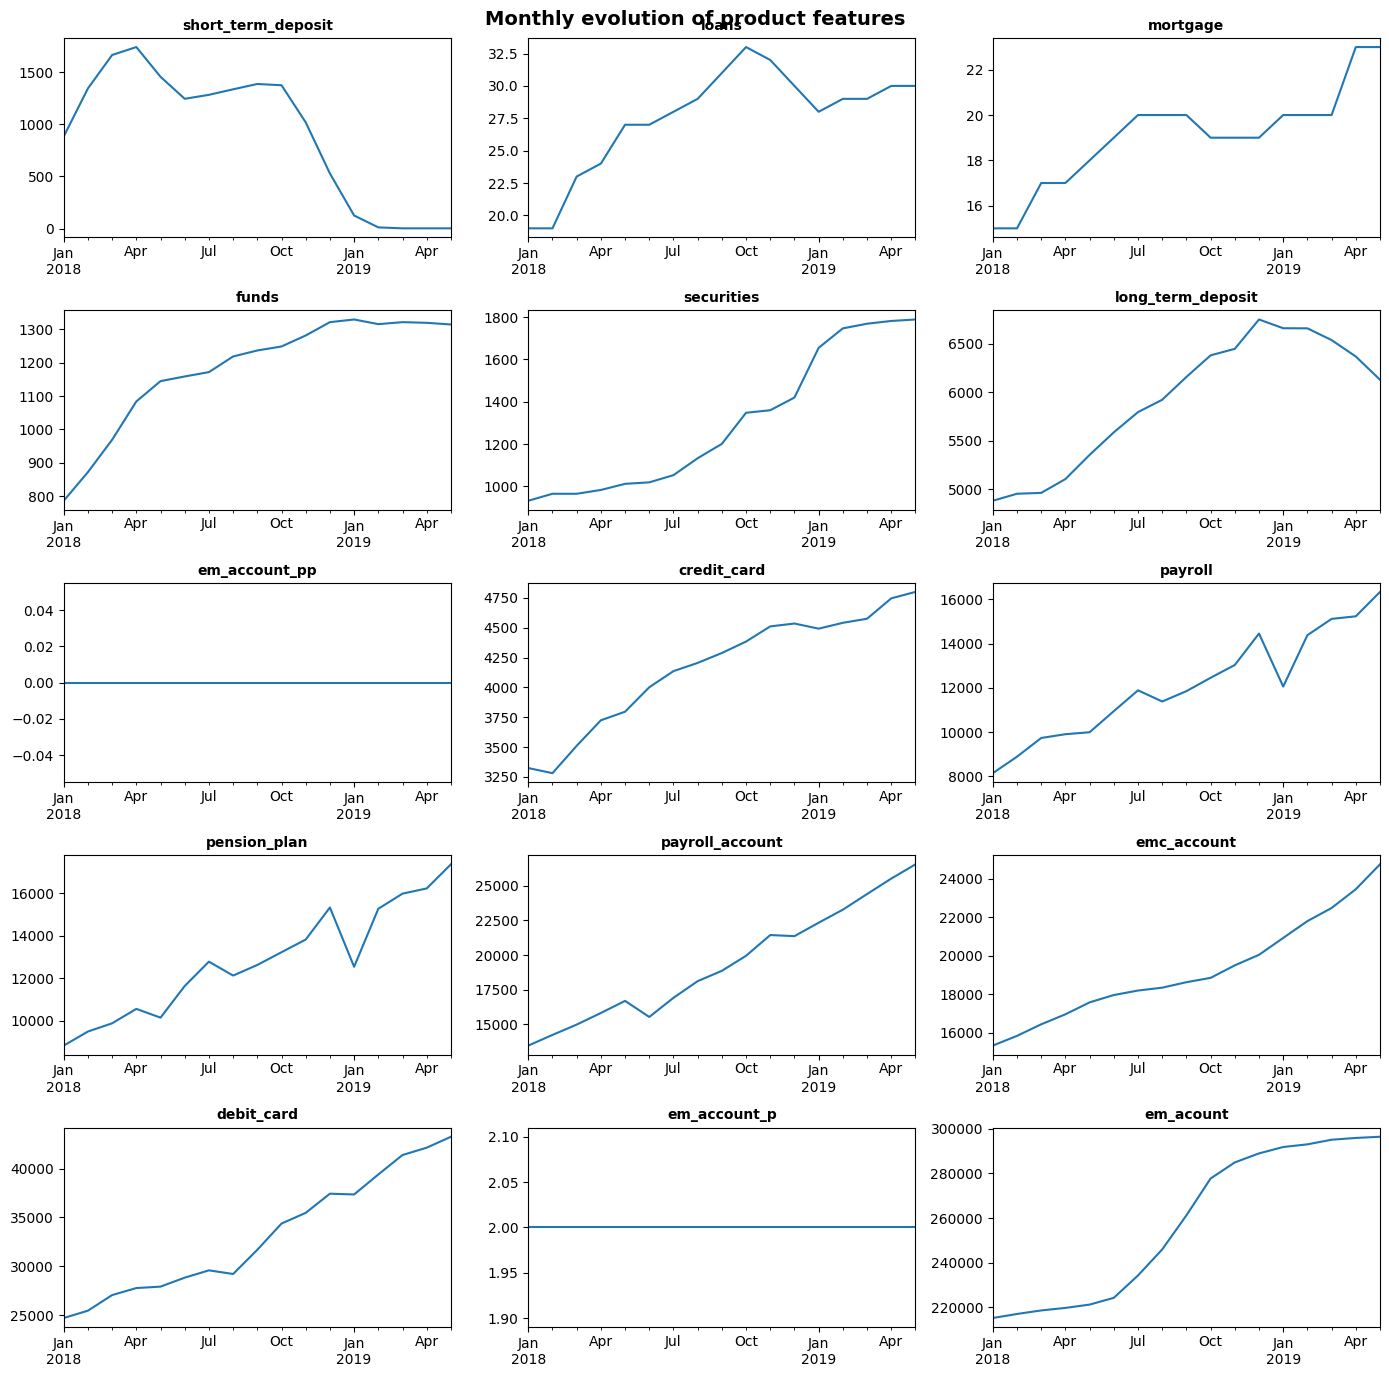

In [17]:
# set dates as index

# group by feature + set dates as indexes to plot montly evolution of the products

products_df['pk_partition'] = pd.to_datetime(products_df['pk_partition'], format='%Y-%m-%d')
products_df_bydate = products_df.set_index('pk_partition')

# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(bool_feat):
    products_df_bydate.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')


In [18]:
# I think it is easy to see now the cumulative of the different products over time
# one first thought that comes to mind is that there might be too many products and they might be biting off more than they can chew
# The most striking figures are:
#   - Short term deposit: started ok, has gone to zero
#   - loans and mortgages: we have almost no clients compared with the client base we have.
#       one thing to look at  is the revenue that comes from these products because if it is high then it would be worth keeping it and push to get more clients
#   - em_account_p / pp : 2 clients for the former and 0 for the latter in the whole thing. I wonder if those two are the CEO and the marketing guy.
#       In any case, this needs to be notified for sure to the board.
# for the rest:
#   - long term deposit is going down, together with short term deposit it seems that the current client base prefers the em wallet to do other things like having a second card or some money for 
#       things like crypto and so on. It looks like a revolut sort of company.
#   - funds, securities and basic accounts are stable for now.
#   - the other are streadily increasing

### Commercial info

In [19]:
commercial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


In [20]:
## Dtypes
###########################

In [21]:
# active customer to uint8
commercial_df['active_customer'].value_counts()

0.00    3557573
1.00    2405351
Name: active_customer, dtype: int64

In [22]:
commercial_df['active_customer'] = commercial_df['active_customer'].astype('uint8')

In [23]:
# dates to dates
commercial_df['pk_partition'] = pd.to_datetime(commercial_df['pk_partition'], format='%Y-%m-%d')

In [24]:
# commercial_df['entry_date'] = pd.to_datetime(commercial_df['entry_date'], format='%Y-%m-%d')

# something going on with the leap year, will investigate later
# I have seen in stack overflow that tey propose errors = coerce. However this will replace the conflicting values with NaT
# and I don't really want to skip those dates because they are part of the cycle.

# I could maybe change those dates to the 28th Feb so it doesn't give an error and it is still computed in february

In [25]:
# sanity check
commercial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       object        
 3   entry_channel    object        
 4   active_customer  uint8         
 5   segment          object        
dtypes: datetime64[ns](1), int64(1), object(3), uint8(1)
memory usage: 278.6+ MB


In [26]:
## duplicates
################

commercial_df[commercial_df.duplicated()].shape

(0, 6)

In [27]:
# no duplicates

In [28]:
## Null values
##################

commercial_df.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [29]:
print(f"entry channel missing values:{round(13303300/5962924)}%")
print(f"segment missing values:{round(13394400/5962924)}%")

entry channel missing values:2%
segment missing values:2%


In [30]:
# not so many missing values.
# for now I will input a new value: "unknown_segment / channel"
# for the channels I'll see because there might be a grouping if most entry channels are not relevant

commercial_df['entry_channel'].fillna('unknown_channel', inplace=True)
commercial_df['segment'].fillna('unknown_segment', inplace=True)

In [31]:
commercial_df.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64

In [32]:
## Plot / Distributions
######################

In [33]:
commercial_df_bydate = commercial_df.set_index('pk_partition')

Text(0.5, 0.98, 'Active Customers Feature')

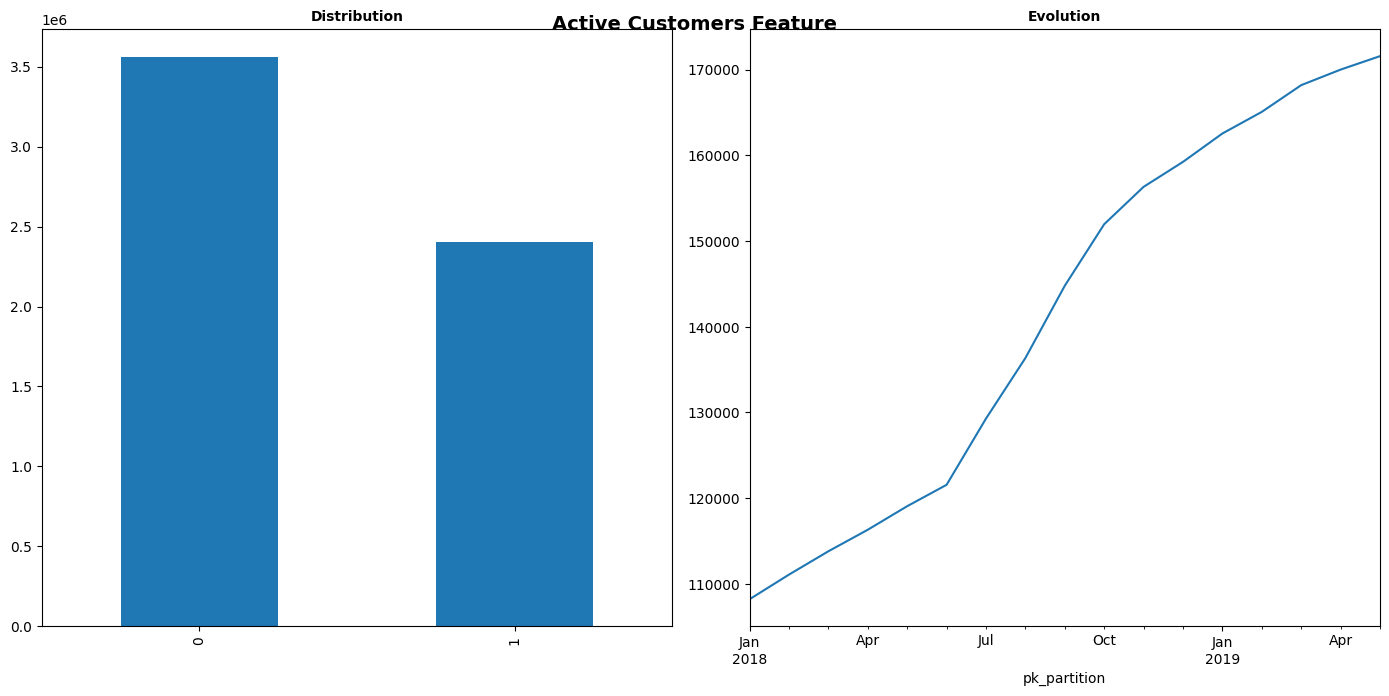

In [34]:
# Active customers
# ------------------------

# instantiate figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(14,7)) 
axes = axes.flat

# plot
commercial_df['active_customer'].value_counts().plot.bar(ax = axes[0])
commercial_df_bydate.resample('M')['active_customer'].sum().plot(ax = axes[1])

# format
axes[0].set_title('Distribution', fontsize = 10, fontweight = 'bold')
axes[1].set_title('Evolution', fontsize = 10, fontweight = 'bold')
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Active Customers Feature', fontsize = 14, fontweight = 'bold')

In [35]:
# less than a 50% of active customers but very good evolution

In [36]:
# Entry channel
# ----------------------

In [37]:
commercial_df['entry_channel'].value_counts().iloc[0:15]

KHE                3113947
KFC                 890620
KHQ                 590280
KAT                 416084
KHK                 230197
KHM                 176591
unknown_channel     133033
KHN                 108434
KFA                  79020
KHD                  75899
RED                  60601
KHL                  41736
KHF                  20657
KHO                   8247
KAZ                   5635
Name: entry_channel, dtype: int64

Text(0.5, 0.98, 'Distribution of Entry channel')

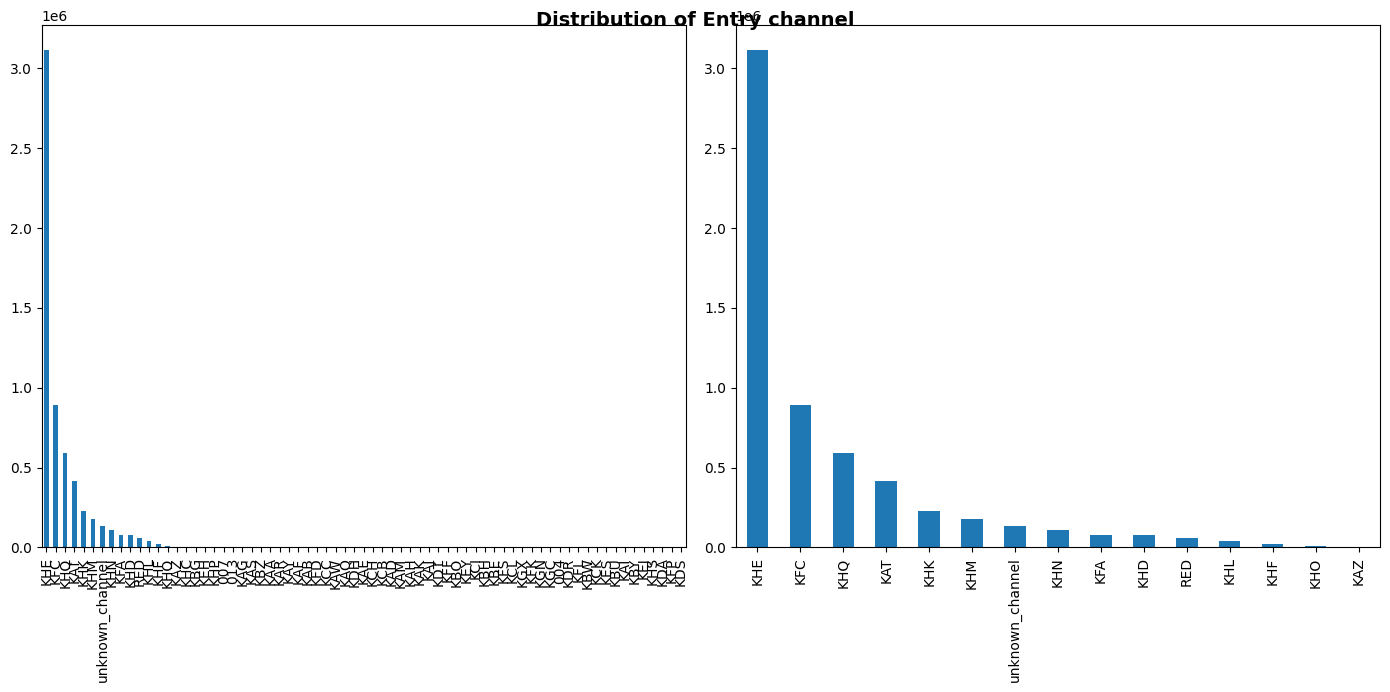

In [38]:
# instantiate figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(14,7)) #  
axes = axes.flat

# plot
commercial_df['entry_channel'].value_counts().plot.bar(ax = axes[0])
commercial_df['entry_channel'].value_counts().iloc[0:15].plot.bar(ax = axes[1])

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Distribution of Entry channel', fontsize = 14, fontweight = 'bold')

In [39]:
# from KHO onwards, incluiding it, i would group the entry channels in "Others". (It is the last biggest drop)

In [40]:
# Segment
# ----------

In [41]:
commercial_df['segment'].value_counts()

# in any case this is tricky because the customers appear repeated on a monthly basis
# so this value counts is the cumulative over the months, not individual customers

03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
unknown_segment        133944
01 - TOP                97939
Name: segment, dtype: int64

<AxesSubplot: >

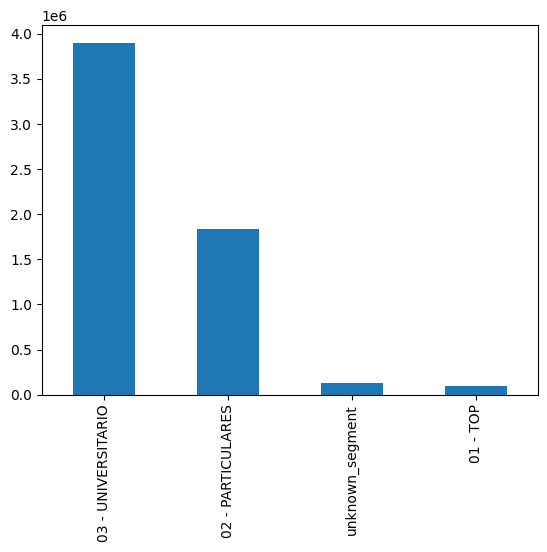

In [42]:
commercial_df['segment'].value_counts().plot.bar()

In [43]:
# mostly people from university and individuals, specially the first one
# unknown segment and top much lower precentages. Need to check what is top, specially if it matches with payroll account or something like that because it could be
# that it is used by a company to pay wages 

In [44]:
# I will onehot encode this real quick just to see the evolution over time

_dummy_dataset = pd.get_dummies(commercial_df_bydate['segment'], prefix = 'segment')
commercial_df_bydate = pd.concat([commercial_df_bydate,_dummy_dataset],axis = 1)
# commercial_df_bydate.drop(['segment'], axis = 1, inplace = True)
commercial_df_bydate.head()

,pk_cid,entry_date,entry_channel,active_customer,segment,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,segment_unknown_segment
pk_partition,,,,,,,,,
2018-01-28,1375586,2018-01-12,KHL,1,02 - PARTICULARES,0,1,0,0
2018-01-28,1050611,2015-08-10,KHE,0,03 - UNIVERSITARIO,0,0,1,0
2018-01-28,1050612,2015-08-10,KHE,0,03 - UNIVERSITARIO,0,0,1,0
2018-01-28,1050613,2015-08-10,KHD,0,03 - UNIVERSITARIO,0,0,1,0
2018-01-28,1050614,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,1,0


Text(0.5, 0.98, 'Monthly evolution of segments')

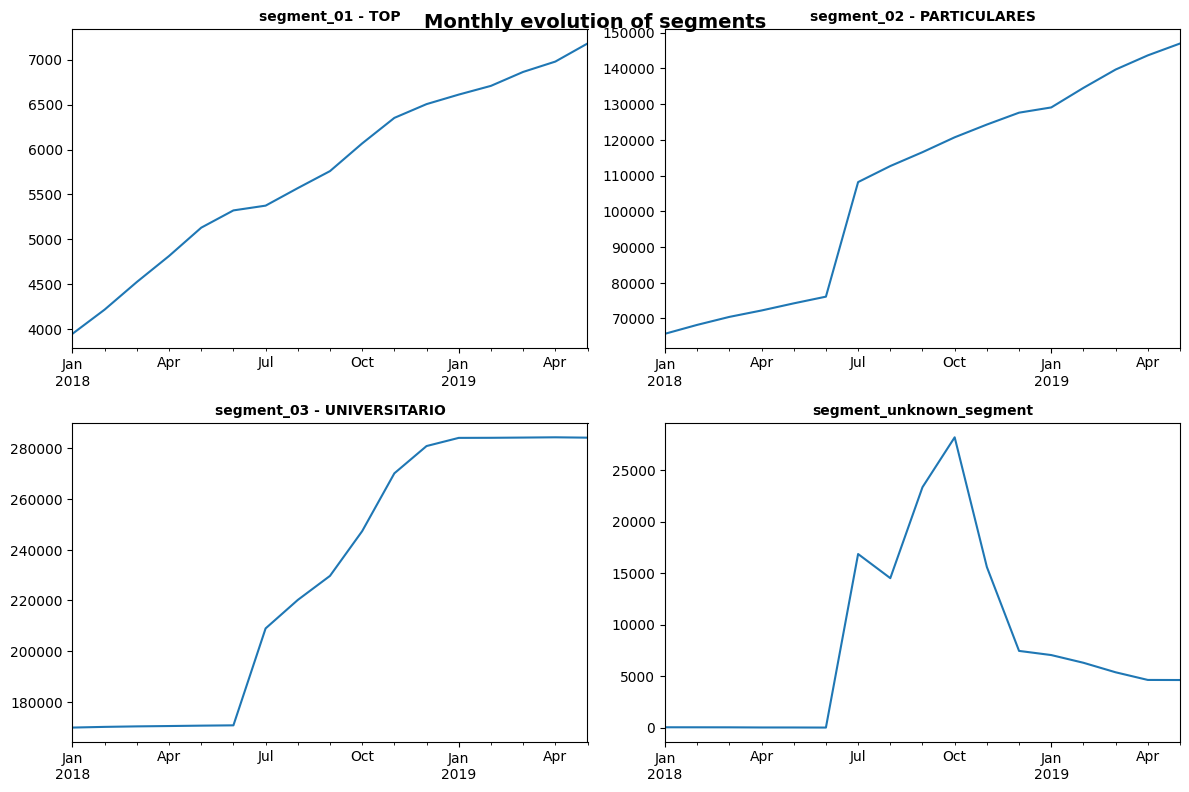

In [45]:
# columns to plot
_aux_segment_cols = [col for col in commercial_df_bydate.columns if "segment_" in col]

# instantiate figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(12,8)) #  
axes = axes.flat

# plot
for i, col in enumerate(_aux_segment_cols):
    commercial_df_bydate.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of segments', fontsize = 14, fontweight = 'bold')

In [46]:
# top category steadily increasing over time, we will have to check which kind of products they have
# something happened in June 2018 which was a huge success for the company, during that month they got a sharp increase on Universitaries, individuals and unknowns

# universitaries seems saturated while particular keeps increasing and I am going to assume that they are doing a better job at capturing the segment and that's why we see the big drop

### Sociodemographic

In [47]:
socio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB


In [48]:
# Dtypes
##########

In [49]:
# Deceased to uint8
socio_df['deceased'].value_counts()

N    5961849
S       1075
Name: deceased, dtype: int64

In [50]:
socio_df.loc[socio_df['deceased']=='N', 'deceased'] = 0
socio_df.loc[socio_df['deceased']=='S', 'deceased'] = 1

In [51]:
socio_df['deceased'].value_counts()

0    5961849
1       1075
Name: deceased, dtype: int64

In [52]:
socio_df['deceased'] = socio_df['deceased'].astype('uint8')

In [53]:
# Gender
# I would like to transform to uint8 but it has nans so I will keep it as an object for now
# In any case ther are very few nans so it could be considered to drop them after a deper exploration to confirm we are not losing valuable information

socio_df['gender'].isnull().sum()

25

In [54]:
socio_df['gender'].fillna('unknown_gender', inplace=True)

In [55]:
print(socio_df['gender'].value_counts())

H                 3087502
V                 2875397
unknown_gender         25
Name: gender, dtype: int64


In [56]:
# Region code

# we have null values so let's check if region code 0 exists.

socio_df[socio_df['region_code']==0]

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


In [57]:
# there is no region code = 0 so ew can use that value for missing region codes.
# Later on if we want to categorize we know that region code 0 means unknown region 

socio_df['region_code'].fillna(0, inplace=True)

In [58]:
socio_df['region_code'].isnull().sum()

0

In [59]:
# transform to integer
socio_df['region_code'] = socio_df['region_code'].astype('int')

In [60]:
# one last thing: dates to dates
socio_df['pk_partition'] = pd.to_datetime(socio_df['pk_partition'], format='%Y-%m-%d')

In [61]:
socio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        int64         
 1   pk_partition  datetime64[ns]
 2   country_id    object        
 3   region_code   int32         
 4   gender        object        
 5   age           int64         
 6   deceased      uint8         
 7   salary        float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(2), uint8(1)
memory usage: 346.9+ MB


In [62]:
# Duplicates
###########

In [63]:
socio_df[socio_df.duplicated()].shape

(0, 8)

In [64]:
# no duplicates to handle

In [65]:
# Null values
################

In [66]:
socio_df.isnull().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary          1512103
dtype: int64

In [67]:
1512103*100/socio_df.shape[0]

25.3584147643002

In [68]:
# we have already dealt with all null values except for those of salary.
# The nulls in salary represent a 25% of the data, which is quite a lot
# Right now it is difficult to input anything for the missing values so I iwll keep it as it is.
# Later on during the exploration of the variable itself will have a deeper look and try to think what can be done with it.

In [69]:
# Plot / distributions
####################

In [70]:
# country 
# -------

In [71]:
socio_df['country_id'].value_counts()

ES    5960672
GB        441
FR        225
DE        199
US        195
       ...   
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, Length: 41, dtype: int64

In [72]:
# Spain is clearly the winner

<AxesSubplot: >

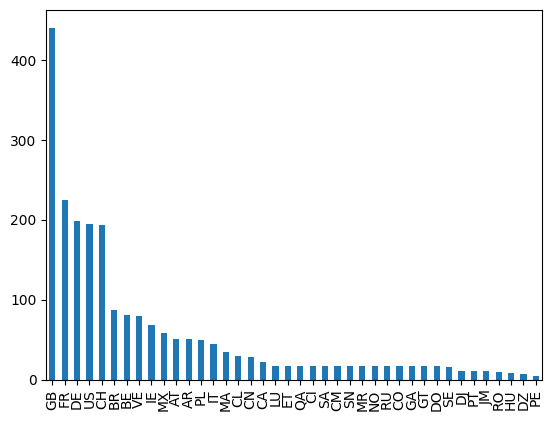

In [73]:
# Let's have a look at the other countries
socio_df['country_id'].value_counts().iloc[1:].plot.bar()

In [74]:
# during the data transformation phase we can keep significant countries and group the others

# Also, these are cumulative values, I should maybe do a quick one hot encode to check the contry evolution 

In [75]:
# first get the dataframe

_aux_country_time = socio_df[['pk_partition', 'country_id']]
_aux_country_time = _aux_country_time.set_index('pk_partition')
_dummy_dataset = pd.get_dummies(_aux_country_time['country_id']) #, prefix = 'segment'
_aux_country_time = pd.concat([_aux_country_time,_dummy_dataset],axis = 1)
_aux_country_time.drop(['country_id'], axis = 1, inplace = True)
_aux_country_time.head()


,AR,AT,BE,BR,CA,CH,CI,CL,CM,CN,...,PL,PT,QA,RO,RU,SA,SE,SN,US,VE
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
_aux_country_time = _aux_country_time.resample('M').sum()
_aux_country_time


,AR,AT,BE,BR,CA,CH,CI,CL,CM,CN,...,PL,PT,QA,RO,RU,SA,SE,SN,US,VE
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-31,2,3,2,3,1,9,1,2,1,2,...,2,0,1,0,1,1,0,1,5,4
2018-02-28,2,3,2,3,1,9,1,2,1,2,...,2,0,1,0,1,1,0,1,6,4
2018-03-31,2,3,2,4,1,9,1,2,1,2,...,2,0,1,0,1,1,0,1,6,4
2018-04-30,2,3,2,4,1,9,1,2,1,2,...,2,0,1,0,1,1,0,1,6,4
2018-05-31,2,3,2,4,1,9,1,2,1,2,...,2,0,1,0,1,1,0,1,6,4
2018-06-30,2,3,2,4,1,9,1,2,1,2,...,2,0,1,0,1,1,0,1,5,4
2018-07-31,3,3,6,5,2,13,1,2,1,2,...,2,1,1,0,1,1,1,1,13,5
2018-08-31,3,3,6,6,2,13,1,2,1,2,...,2,1,1,0,1,1,1,1,13,5
2018-09-30,3,3,6,6,2,13,1,2,1,2,...,3,1,1,1,1,1,1,1,13,5


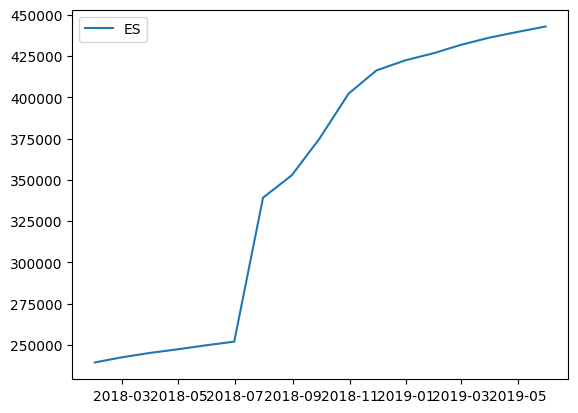

In [77]:
# Spain first because it has most values and we won't see anything otherwise

plt.plot(_aux_country_time['ES'], label = 'ES')
plt.legend()
plt.show()


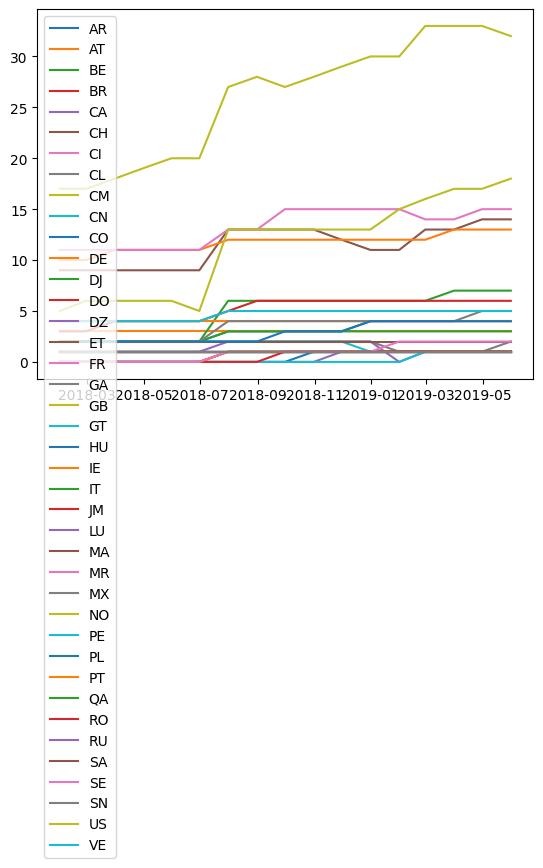

In [78]:
for country in _aux_country_time.columns:
    if country != 'ES':
        plt.plot(_aux_country_time[country], label = country)

plt.legend(loc = 'upper left')
plt.show()

In [79]:
# Region
# -----------

In [80]:
socio_df['region_code'].value_counts()

28    1185757
8      600362
46     358142
30     296856
41     290447
       ...   
44      12616
42       8500
51       2896
52       2638
0        2264
Name: region_code, Length: 53, dtype: int64

In [81]:
# there are 50 regions in Spain + 2 autonomous cities + unknown region so it makes sense.
# The number of unknown region ids doesn't completely match the number of foreign countries, we have more unknown regions
socio_df.shape[0] - len(socio_df[socio_df['country_id']=='ES'])

2252

Text(0.5, 0.98, 'Distribution of Region codes')

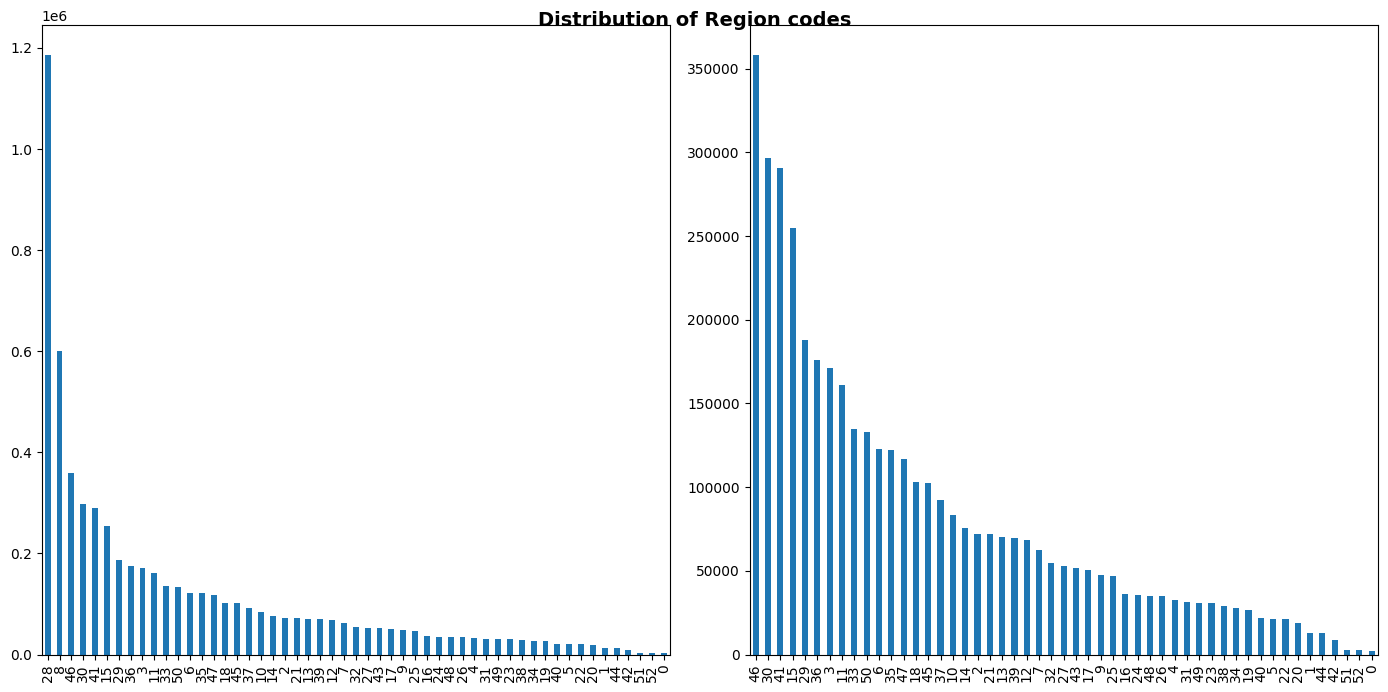

In [82]:
# instantiate figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(14,7)) #  
axes = axes.flat

# plot
socio_df['region_code'].value_counts().plot.bar(ax = axes[0])
socio_df['region_code'].value_counts().iloc[2:].plot.bar(ax = axes[1])

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Distribution of Region codes', fontsize = 14, fontweight = 'bold')

In [83]:
# as with countries, one possible approach is to get relevant regions and group the others

In [84]:
# gender
# ------

In [85]:
socio_df['gender'].value_counts()

H                 3087502
V                 2875397
unknown_gender         25
Name: gender, dtype: int64

<AxesSubplot: >

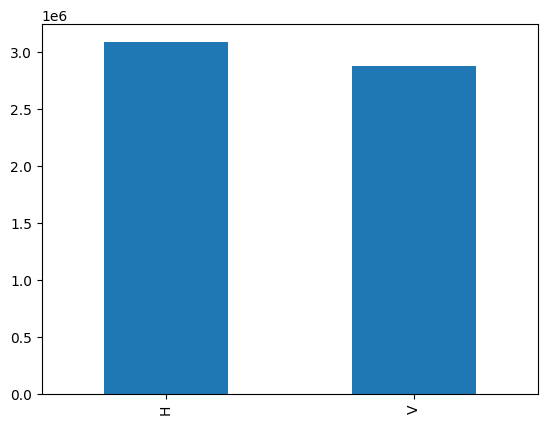

In [86]:
# almost none unknown gender values so I won't plot them

socio_df['gender'].value_counts().iloc[:2].plot.bar()

In [87]:
# the fact that it is written as H/V is very strange. Everythin is in Spanish in general in this dataset so
# I would assume that this is Hembra / Varon

# in cany case good variance

# let's have a look at the plot by time

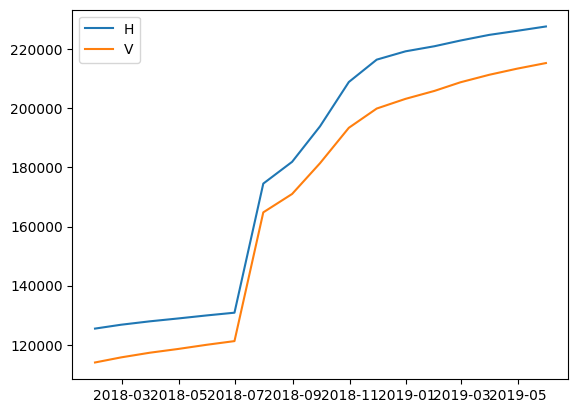

In [88]:
_aux_gender_time = socio_df[['pk_partition', 'gender']]
_aux_gender_time = _aux_gender_time.set_index('pk_partition')
_dummy_dataset = pd.get_dummies(_aux_gender_time['gender'])
_aux_gender_time = pd.concat([_aux_gender_time,_dummy_dataset],axis = 1)
_aux_gender_time.drop(['gender'], axis = 1, inplace = True)
_aux_gender_time = _aux_gender_time.resample('M').sum()
for gender in _aux_gender_time.columns[:2]:
    plt.plot(_aux_gender_time[gender], label = gender)

plt.legend()
plt.show()

In [89]:
# the peak matches the increase in summer 2018.as_integer_ratio
# Practically same distribution

In [90]:
# deceased
# --------

In [91]:
socio_df['deceased'].value_counts()

0    5961849
1       1075
Name: deceased, dtype: int64

In [92]:
# is this cumulative or do they deregister someone when passes away?

deceased_ppl = socio_df[socio_df['deceased']==1]
len(deceased_ppl['pk_cid'].unique())

129

In [93]:
deceased_ppl['pk_cid'].value_counts()

1054415    17
1007836    17
1233346    17
1228812    17
1138837    17
           ..
1326404     1
1441140     1
1009307     1
1230329     1
1123453     1
Name: pk_cid, Length: 129, dtype: int64

In [94]:
deceased_ppl[deceased_ppl['pk_cid']==1054415]

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
4787,1054415,2018-01-28,ES,46,V,60,1,"96,549.36"
1251244,1054415,2018-02-28,ES,46,V,60,1,"96,549.36"
1849301,1054415,2018-03-28,ES,46,V,60,1,"96,549.36"
2503073,1054415,2018-04-28,ES,46,V,60,1,"96,549.36"
2518406,1054415,2018-05-28,ES,46,V,60,1,"96,549.36"
3150860,1054415,2018-06-28,ES,46,V,60,1,"96,549.36"
4377042,1054415,2018-07-28,ES,46,V,60,1,"96,549.36"
5134198,1054415,2018-08-28,ES,46,V,60,1,"96,549.36"
6051461,1054415,2018-09-28,ES,46,V,60,1,"96,549.36"
6494630,1054415,2018-10-28,ES,46,V,60,1,"96,549.36"


In [95]:
# they keep track of the account even though they know the client is not here anymore
# there are "only" 126 clients that have sadly passed away

In [96]:
deceased_ppl['age'].describe()

count   1,075.00
mean       69.18
std        22.25
min        20.00
25%        54.50
50%        75.00
75%        88.00
max       102.00
Name: age, dtype: float64

In [97]:
# Age
# -------

In [98]:
socio_df['age'].describe()

count   5,962,924.00
mean           29.76
std            11.98
min             2.00
25%            22.00
50%            25.00
75%            34.00
max           105.00
Name: age, dtype: float64

<AxesSubplot: xlabel='age'>

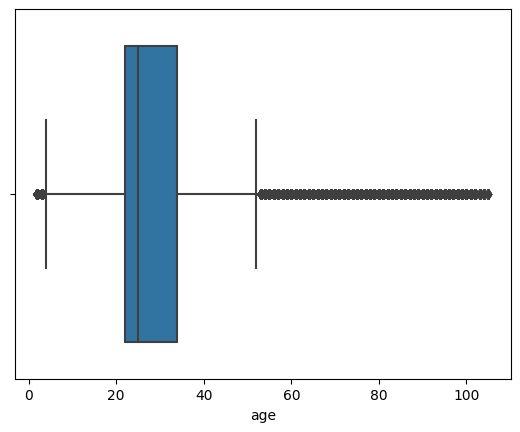

In [99]:
sns.boxplot(
    data = socio_df,
    x = 'age'
)

In [100]:
print(22-1.5*(34-22))
print(34+1.5*(34-22))

4.0
52.0


<AxesSubplot: xlabel='age', ylabel='Count'>

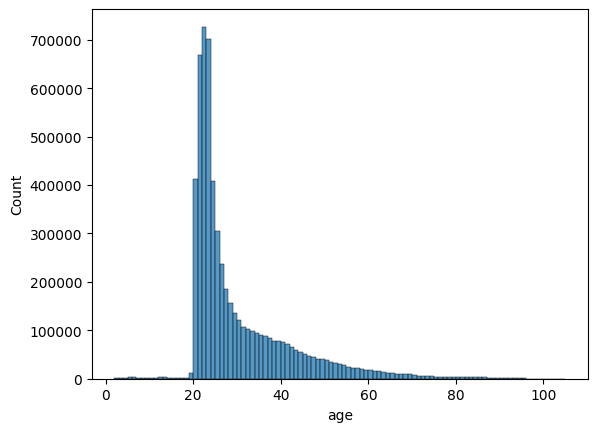

In [101]:
sns.histplot(
    data = socio_df,
    x = 'age',
    binwidth=1
)

<AxesSubplot: xlabel='age', ylabel='Count'>

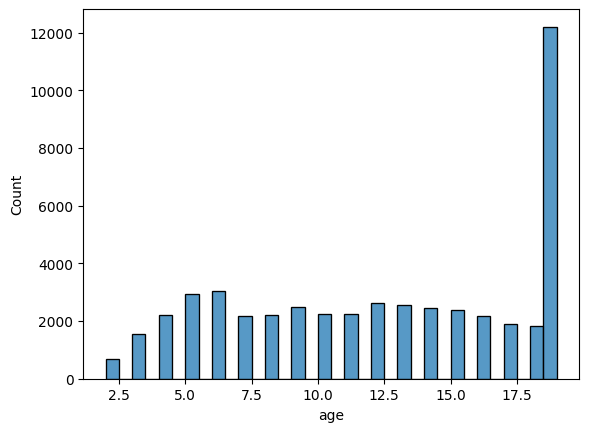

In [102]:
sns.histplot(
    data = socio_df[socio_df['age']<20],
    x = 'age',
    binwidth=0.5
)

In [103]:
# will have to check what these clients are being so young.
# Are these accounts opened by their parents?
# Also the drop in 18yo is very much noticeable 

<AxesSubplot: xlabel='age', ylabel='Count'>

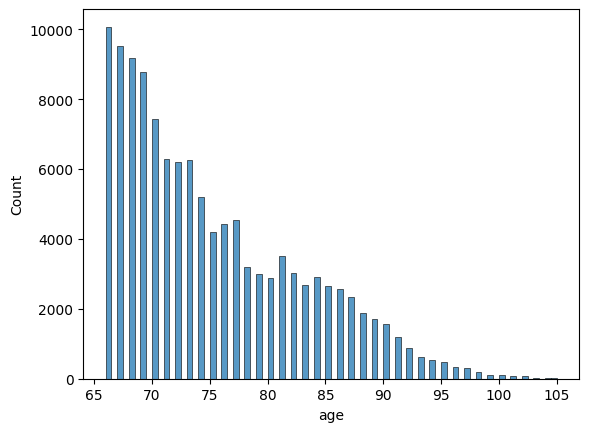

In [104]:
sns.histplot(
    data = socio_df[socio_df['age']>65],
    x = 'age',
    binwidth=0.5
)

In [105]:
# I guess it could be grouped like:
# under 18, every 5 years up to 65, then 10 years, then above 85... something like this
# use the values from the boxplot maybe

In [106]:
# Salary
# ------

In [107]:
socio_df['salary'].describe()

count    4,450,821.00
mean       115,816.72
std        199,551.89
min          1,202.73
25%         61,500.63
50%         88,654.65
75%        131,669.91
max     28,894,395.51
Name: salary, dtype: float64

In [108]:
Q1_salary = 61500.63
Q3_salary = 131669.91
IQR = Q3_salary - Q1_salary
low_fence_salary = Q1_salary - 1.5*IQR
upp_fence_salary = Q3_salary + 1.5*IQR

display(low_fence_salary, upp_fence_salary)

-43753.29

236923.83000000002

In [109]:
# the range is very strage.
# First of all I assume that the values are in Euros being Spain the most present country in the dataset, though it will be worth checking
# what's the distribution of salaries per country because mayeb the extremely high values come from a country with a devaluated currency
# the gap between the 3rdIQ and max is abissal
# 
# Another thing to check, the low salaries: do they correspond to under 18s or students? that way we will filter out data
#  

<AxesSubplot: xlabel='salary'>

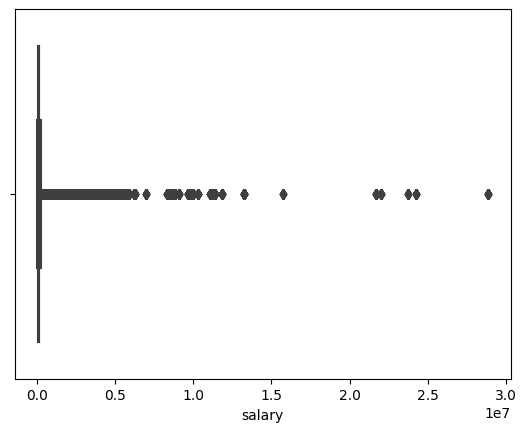

In [110]:
sns.boxplot(
    data = socio_df,
    x = 'salary'
)

In [111]:
# let's check the salaries only in Spain

socio_df[socio_df['country_id']=='ES'].describe()

,pk_cid,region_code,age,deceased,salary
count,"5,960,672.00","5,960,672.00","5,960,672.00","5,960,672.00","4,450,784.00"
mean,"1,234,964.61",25.81,29.76,0.00,"115,816.23"
std,"162,281.24",13.60,11.98,0.01,"199,552.40"
min,"15,891.00",0.00,2.00,0.00,"1,202.73"
25%,"1,112,557.00",13.00,22.00,0.00,"61,499.82"
50%,"1,231,126.00",28.00,25.00,0.00,"88,654.47"
75%,"1,352,357.00",36.00,34.00,0.00,"131,669.91"
max,"1,553,689.00",52.00,105.00,1.00,"28,894,395.51"


In [112]:
# nothing to see here

In [113]:
socio_df[socio_df['country_id']!='ES'].describe()

,pk_cid,region_code,age,deceased,salary
count,"2,252.00","2,252.00","2,252.00","2,252.00",37.00
mean,"1,142,801.49",0.00,40.27,0.00,"175,569.56"
std,"189,049.59",0.00,11.62,0.05,"110,792.69"
min,"130,419.00",0.00,3.00,0.00,"46,883.70"
25%,"1,011,235.00",0.00,33.00,0.00,"111,759.69"
50%,"1,134,182.00",0.00,39.00,0.00,"114,949.44"
75%,"1,259,691.00",0.00,46.00,0.00,"229,746.69"
max,"1,544,346.00",0.00,85.00,1.00,"385,514.46"


<AxesSubplot: xlabel='salary'>

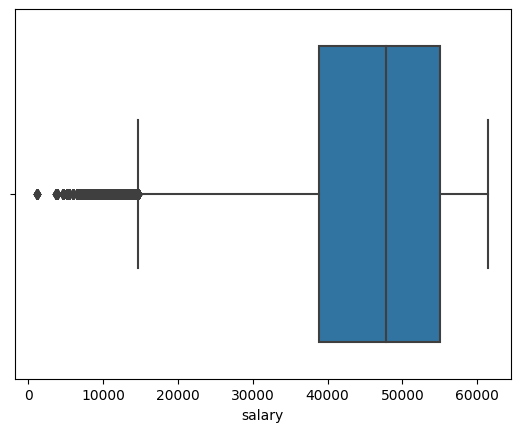

In [114]:
sns.boxplot(
    data = socio_df[socio_df['salary']<61500],
    x = 'salary'
)

<AxesSubplot: xlabel='salary'>

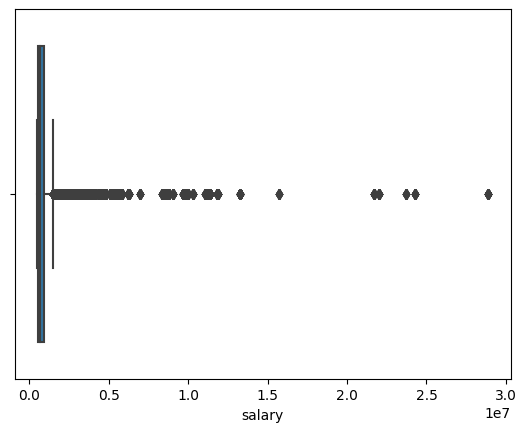

In [115]:
sns.boxplot(
    data = socio_df[socio_df['salary']>500000],
    x = 'salary'
)

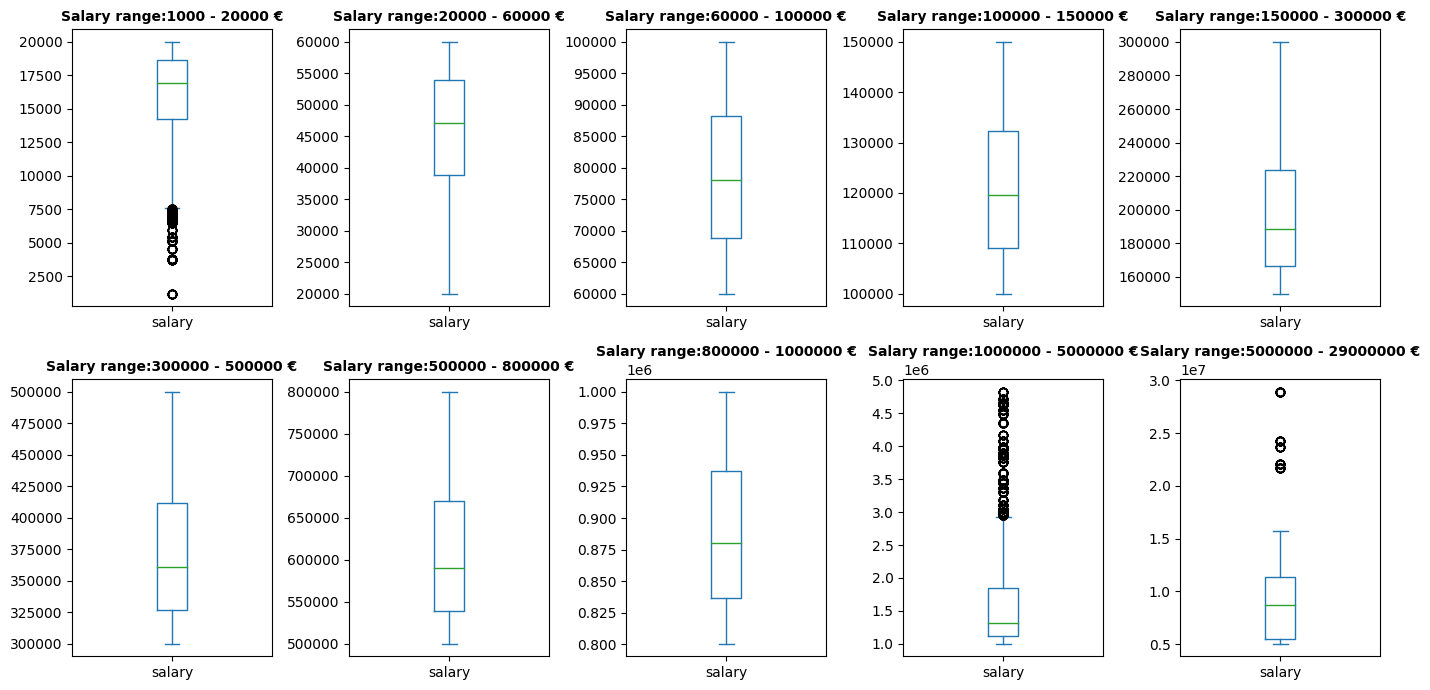

In [116]:
_salary_plot_limits = [20000, 60000, 100000, 150000, 300000, 500000, 800000, 1000000, 5000000, 29000000]
lowlim = 1000

fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (14,7))
axes = axes.flat

# plot
for i, limit in enumerate(_salary_plot_limits):
    socio_df['salary'][(socio_df['salary']>lowlim) & (socio_df['salary']<limit)].plot.box(ax = axes[i])
    axes[i].set_title(f"Salary range:{lowlim} - {limit} €", fontsize = 10, fontweight = 'bold')
    lowlim = limit

fig.tight_layout()
# plt.subplots_adjust(top = 0.96)
# fig.suptitle('Distribution of salary in ranges', fontsize = 14, fontweight = 'bold')

In [117]:
# Matbe we should do salaries per client id

_aux_salary = socio_df.drop_duplicates(subset='pk_cid')

In [118]:
print(_aux_salary.shape)
print(len(socio_df['pk_cid'].unique()))

(456373, 8)
456373


In [119]:
_aux_salary['salary'].describe()

count      299,443.00
mean       116,722.40
std        206,902.68
min          1,202.73
25%         61,653.75
50%         89,018.34
75%        132,530.34
max     28,894,395.51
Name: salary, dtype: float64

<AxesSubplot: xlabel='salary'>

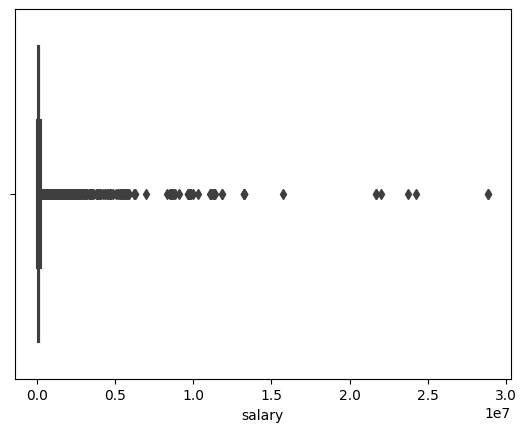

In [120]:
sns.boxplot(
    data = _aux_salary,
    x = 'salary'
)

In [121]:
# same as before

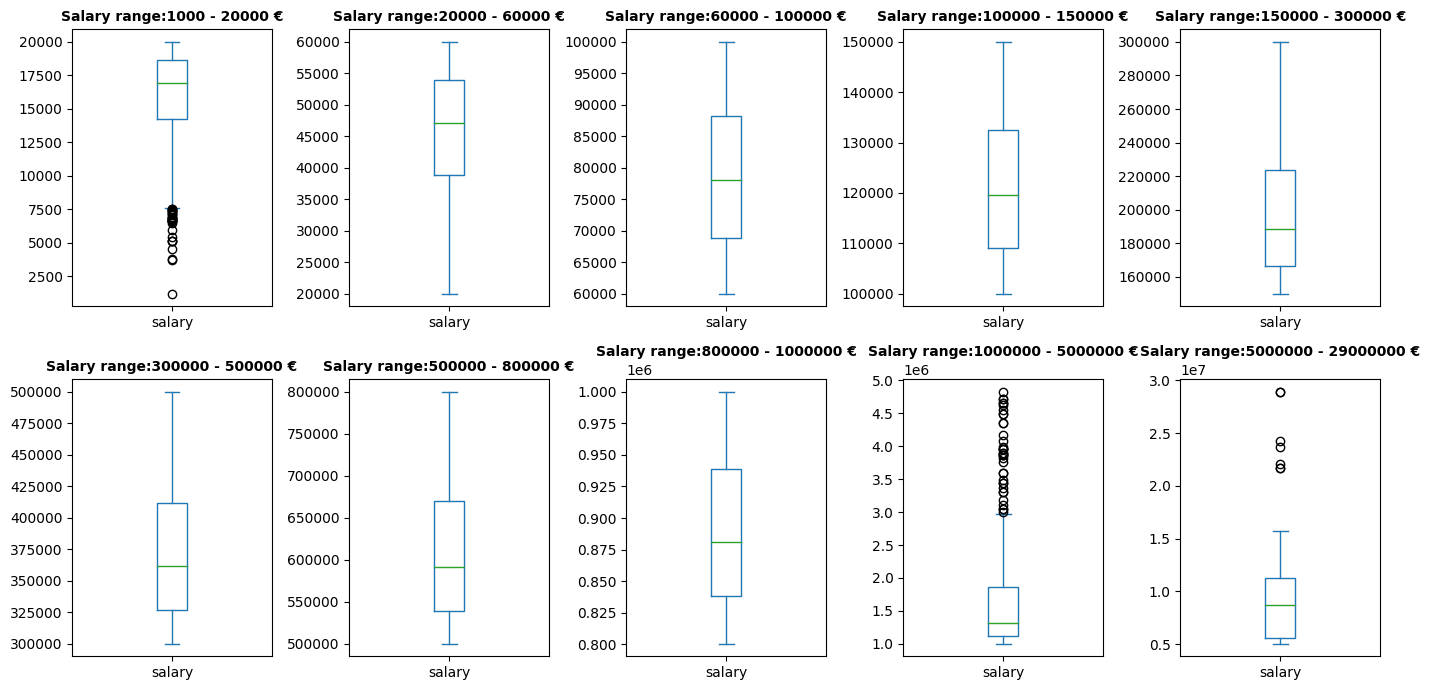

In [122]:
_salary_plot_limits = [20000, 60000, 100000, 150000, 300000, 500000, 800000, 1000000, 5000000, 29000000]
lowlim = 1000

fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (14,7))
axes = axes.flat

# plot
for i, limit in enumerate(_salary_plot_limits):
    _aux_salary['salary'][(_aux_salary['salary']>lowlim) & (_aux_salary['salary']<limit)].plot.box(ax = axes[i])
    axes[i].set_title(f"Salary range:{lowlim} - {limit} €", fontsize = 10, fontweight = 'bold')
    lowlim = limit

fig.tight_layout()

In [123]:
# we get exactly the same

In [124]:
lowlim = 1000
for limit in _salary_plot_limits:
    clients_range = _aux_salary['salary'][(_aux_salary['salary']>lowlim) & (_aux_salary['salary']<limit)].shape[0]
    print(f"The number of clients with salary between {lowlim} - {limit} € is {clients_range}")
    lowlim = limit

The number of clients with salary between 1000 - 20000 € is 1491
The number of clients with salary between 20000 - 60000 € is 68421
The number of clients with salary between 60000 - 100000 € is 103711
The number of clients with salary between 100000 - 150000 € is 67774
The number of clients with salary between 150000 - 300000 € is 47189
The number of clients with salary between 300000 - 500000 € is 7984
The number of clients with salary between 500000 - 800000 € is 1891
The number of clients with salary between 800000 - 1000000 € is 393
The number of clients with salary between 1000000 - 5000000 € is 518
The number of clients with salary between 5000000 - 29000000 € is 71


In [125]:
products_df

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,1166765,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
13647305,1166764,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
13647306,1166763,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
13647307,1166789,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
